In [1]:
!nvidia-smi

Fri Jul 30 17:36:51 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    24W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
 from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
train_path = '/content/drive/MyDrive/dataset/train.csv'
test_path = '/content/drive/MyDrive/dataset/test.csv'
sample_sub_path = '/content/drive/MyDrive/dataset/sample_submission.csv'

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import csv


In [5]:
# Loading in the data 
train_data = pd.read_csv(train_path , escapechar = "\\" , quoting = csv.QUOTE_NONE)

# Loading the test dataset 
test_data = pd.read_csv(test_path , escapechar = "\\" , quoting = csv.QUOTE_NONE)
# # Sample submission 
# sample_sub = pd.read_csv(sample_sub_path , escapechar = "\\" , quoting = csv.QUOTE_NONE)



## Working with a subset 

#### Multi-Input Model 

In [6]:
# Getting the subset of the sample 
train_sample = train_data.sample(frac= 1 , random_state= 42)
#val_sample = train_data.sample(frac = 0.1 , random_state= 3)

In [7]:
train_sample.head().T

,2297143,2078681,1125035,1928801,864509
TITLE,"Amsik®Blind Spot Round Mirror Black, (Real Gla...",Nivea Face Sun Block Whitening Cream SPF 50 Pa...,ROZVEH Women's Shift Brown Dress,Narayan Creation Pashmina Palazzo Suit Dupatta...,Q-rious Women's Silicon Strap Spagettis/Camiso...
DESCRIPTION,The mirrors easily mount to the vehicle's left...,Nivea Sun Fac Sun Block Whitening Cream Spf 50...,"<p>Super Fine Rayon,&nbsp;Brown Floral Print d...",Narayan creatins pashmina unstitched palazzo s...,Trendy Q-rious Spagetti with sequin detachable...
BULLET_POINTS,"[It is small, but it is smart mirror, and work...",NIVEA face SUN Block Whitening Cream SPF 50 PA ++,"[Material: Super Fine Rayon, Brown Floral Prin...",NaN,"[Silicon and Elastic strap option,Detachable S..."
BRAND,AMSIK,Nivea,ROZVEH,Generic,Q-rious
BROWSE_NODE_ID,32296,35,1724,465,2003


In [8]:
train_sample['Info'] = train_sample.DESCRIPTION.astype(str) + '  '+  train_sample.BULLET_POINTS.astype(str)
train_sample['title'] = train_sample.TITLE.astype(str)

In [9]:
train_sample.head(10)

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID,Info,title
2297143,"Amsik®Blind Spot Round Mirror Black, (Real Gla...",The mirrors easily mount to the vehicle's left...,"[It is small, but it is smart mirror, and work...",AMSIK,32296,The mirrors easily mount to the vehicle's left...,"Amsik®Blind Spot Round Mirror Black, (Real Gla..."
2078681,Nivea Face Sun Block Whitening Cream SPF 50 Pa...,Nivea Sun Fac Sun Block Whitening Cream Spf 50...,NIVEA face SUN Block Whitening Cream SPF 50 PA ++,Nivea,35,Nivea Sun Fac Sun Block Whitening Cream Spf 50...,Nivea Face Sun Block Whitening Cream SPF 50 Pa...
1125035,ROZVEH Women's Shift Brown Dress,"<p>Super Fine Rayon,&nbsp;Brown Floral Print d...","[Material: Super Fine Rayon, Brown Floral Prin...",ROZVEH,1724,"<p>Super Fine Rayon,&nbsp;Brown Floral Print d...",ROZVEH Women's Shift Brown Dress
1928801,Narayan Creation Pashmina Palazzo Suit Dupatta...,Narayan creatins pashmina unstitched palazzo s...,NaN,Generic,465,Narayan creatins pashmina unstitched palazzo s...,Narayan Creation Pashmina Palazzo Suit Dupatta...
864509,Q-rious Women's Silicon Strap Spagettis/Camiso...,Trendy Q-rious Spagetti with sequin detachable...,"[Silicon and Elastic strap option,Detachable S...",Q-rious,2003,Trendy Q-rious Spagetti with sequin detachable...,Q-rious Women's Silicon Strap Spagettis/Camiso...
1613202,Hanes Men's Pullover EcoSmart Fleece Hooded Sw...,NaN,"[Made with a portion of recycled polyester,Pat...",Hanes,3355,nan [Made with a portion of recycled polyeste...,Hanes Men's Pullover EcoSmart Fleece Hooded Sw...
1794644,Lixada Aluminum Alloy Stem Bike Bicycle Cyclin...,Aluminum alloy construction makes it a lightwe...,"[For 31.8mm handlebar.,For 28.6mm front fork s...",Lixada,61384,Aluminum alloy construction makes it a lightwe...,Lixada Aluminum Alloy Stem Bike Bicycle Cyclin...
1306751,Verca Cotton;Fabric Krishna Bal Gopal Poshak (...,Explore wide range of home décor products from...,"[Quality Guaranteed,Easy Return and Exchange,L...",Verca,1287,Explore wide range of home décor products from...,Verca Cotton;Fabric Krishna Bal Gopal Poshak (...
2031708,EVERWILLOW Girl's Satin Silk Lehenga Choli (Pu...,Pure Satin Silk Lehenga Blouse Set. Featuring ...,"[Wash Care : Dry Clean and Hend Wash.,In the P...",EVERWILLOW,5173,Pure Satin Silk Lehenga Blouse Set. Featuring ...,EVERWILLOW Girl's Satin Silk Lehenga Choli (Pu...
1093990,Vimes All Side Protection Sleek Rubberised Mat...,"<p>""</p> <p><strong>Vimes back cover case for ...",[Camera Protection Technology - Introducing Ou...,VIMES,2040,"<p>""</p> <p><strong>Vimes back cover case for ...",Vimes All Side Protection Sleek Rubberised Mat...


In [10]:
train_sample.isna().sum()

TITLE                 71
DESCRIPTION       723664
BULLET_POINTS     166263
BRAND              56737
BROWSE_NODE_ID         0
Info                   0
title                  0
dtype: int64

In [ ]:
train_sample['BROWSE_NODE_ID']

2297143    32296
2078681       35
1125035     1724
1928801      465
864509      2003
           ...  
1692743     1217
2356330    21895
2229084     1251
2768307     1084
2219110    45027
Name: BROWSE_NODE_ID, Length: 2903024, dtype: int64

In [ ]:
train_sample[['TITLE' , 'Info']].values

array([['Amsik®Blind Spot Round Mirror Black, (Real Glass Made, 2 Pcs/Set) for Toyota Fortuner',
        'The mirrors easily mount to the vehicle\'s left and right side mirrors with pre in sided foam tape and successfully achieved the goal of adding vehicle by enhancing the visibility for the driver Which helping the driver to make safe lane change other drivers in the "blind spot" and helping reduce accidents. Includes one pair of mirrors. 2" size with universal size. Does not spoil the mirror look even if removed later. it is best round blind spot mirror from crest.  [It is small, but it is smart mirror, and works together with the side mirror so great,The blind spots mirrors can be 360° rotatable + 30° sway adjustable with the angle regulator type .,Upgraded real glass mirror body, equips with strong 3M adhesive tape for fast installation.,2 Pcs/set with double tape packaged in all English instruction.]'],
       ['Nivea Face Sun Block Whitening Cream SPF 50 Pa ++ Made in Thailand',

In [11]:
new_train_sample = train_sample.copy()
new_train_sample.head()

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID,Info,title
2297143,"Amsik®Blind Spot Round Mirror Black, (Real Gla...",The mirrors easily mount to the vehicle's left...,"[It is small, but it is smart mirror, and work...",AMSIK,32296,The mirrors easily mount to the vehicle's left...,"Amsik®Blind Spot Round Mirror Black, (Real Gla..."
2078681,Nivea Face Sun Block Whitening Cream SPF 50 Pa...,Nivea Sun Fac Sun Block Whitening Cream Spf 50...,NIVEA face SUN Block Whitening Cream SPF 50 PA ++,Nivea,35,Nivea Sun Fac Sun Block Whitening Cream Spf 50...,Nivea Face Sun Block Whitening Cream SPF 50 Pa...
1125035,ROZVEH Women's Shift Brown Dress,"<p>Super Fine Rayon,&nbsp;Brown Floral Print d...","[Material: Super Fine Rayon, Brown Floral Prin...",ROZVEH,1724,"<p>Super Fine Rayon,&nbsp;Brown Floral Print d...",ROZVEH Women's Shift Brown Dress
1928801,Narayan Creation Pashmina Palazzo Suit Dupatta...,Narayan creatins pashmina unstitched palazzo s...,NaN,Generic,465,Narayan creatins pashmina unstitched palazzo s...,Narayan Creation Pashmina Palazzo Suit Dupatta...
864509,Q-rious Women's Silicon Strap Spagettis/Camiso...,Trendy Q-rious Spagetti with sequin detachable...,"[Silicon and Elastic strap option,Detachable S...",Q-rious,2003,Trendy Q-rious Spagetti with sequin detachable...,Q-rious Women's Silicon Strap Spagettis/Camiso...


In [12]:
# Are there 9919 classes 
train_sample.BROWSE_NODE_ID.value_counts()

1045       215698
5           70318
1251        51929
1052        45553
4           34177
            ...  
279112          1
822060          1
1337233         1
2136811         1
248936          1
Name: BROWSE_NODE_ID, Length: 9919, dtype: int64

Creating a token level embedding 

In [13]:
# # Picking up the train text data 
# info_train_sentences = new_train_sample['Info'].to_list()
# title_train_sentences = new_train_sample['TITLE'].astype(str).to_list()

# # Now our val dataset 


# len(info_train_sentences) , len(title_train_sentences)

In [ ]:
title_train_sentences[:10]

['Amsik®Blind Spot Round Mirror Black, (Real Glass Made, 2 Pcs/Set) for Toyota Fortuner',
 'Nivea Face Sun Block Whitening Cream SPF 50 Pa ++ Made in Thailand',
 "ROZVEH Women's Shift Brown Dress",
 'Narayan Creation Pashmina Palazzo Suit Dupatta Material (Un-Stitched) Pink',
 "Q-rious Women's Silicon Strap Spagettis/Camisole Magenta",
 "Hanes Men's Pullover EcoSmart Fleece Hooded Sweatshirt, Charcoal Heather, L",
 'Lixada Aluminum Alloy Stem Bike Bicycle Cycling Clamp Stem 31.8Mm ±17° MTB Road Bike Stem 70Mm 80Mm 90Mm 110Mm',
 'Verca Cotton;Fabric Krishna Bal Gopal Poshak (Blue)',
 "EVERWILLOW Girl's Satin Silk Lehenga Choli (Purple)",
 'Vimes All Side Protection Sleek Rubberised Matte Soft Silicon Back Case For Redmi Note 5 (Black Mi Note 5 - 2018) (It is not compatibe with Redmi 5 And Note 5 Pro)']

In [ ]:
# # Average sequence length 
# info_sent_lens = [len(sentence.split()) for sentence in info_train_sentences]
# title_sent_lens = [len(title.split()) for title in title_train_sentences]

# avg_sent_len_info = np.mean(info_sent_lens)
# avg_sent_len_title = np.mean(title_sent_lens)

# avg_sent_len_info , avg_sent_len_title

(124.08260627538732, 13.541006550410883)

In [ ]:
# round(avg_sent_len_info) , round(avg_sent_len_title)

(124, 14)

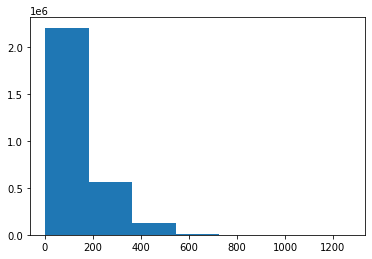

In [ ]:
# # Distribution of the tokens 
# plt.hist(info_sent_lens , bins = 7);

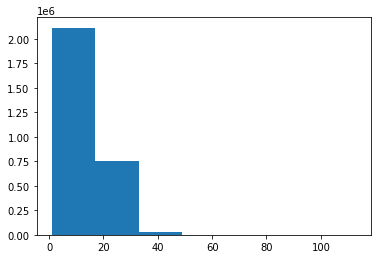

In [ ]:
# plt.hist(title_sent_lens , bins = 7);

In [ ]:
# # How long of a sentence covers 95% of a length 
# info_output_seq_len = int(np.percentile(info_sent_lens , 95))
# title_output_seq_len = int(np.percentile(title_sent_lens , 95))

# info_output_seq_len , title_output_seq_len

(358, 27)

In [ ]:
# # Maximum sentence in the training sentence of both info and title 
# max(info_sent_lens) , max(title_sent_lens)

(1270, 113)

In [ ]:
# round(len(info_train_sentences) / 6)

483837

In [ ]:
# from random import sample 
# little_info_train_sentences = sample(info_train_sentences ,683837)
# len(little_info_train_sentences)

683837

In [ ]:
# # Creating a text vectorizer layer for info (token level embedding)
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# info_text_vect_token_layer = TextVectorization(max_tokens= 5000 , 
#                                                output_sequence_length = info_output_seq_len)

# # Adapting the layer on the train data 
# info_text_vect_token_layer.adapt(little_info_train_sentences)

In [ ]:
# # Test out text vectorizer
# import random
# target_sentence = random.choice(info_train_sentences)
# print(f"Text:\n{target_sentence}")
# print(f"\nLength of text: {len(target_sentence.split())}")
# print(f"\nVectorized text:\n{info_text_vect_token_layer([target_sentence])}")

Text:
May Your Birthday Be Warm. Teddy Bear Newborn Baby Birthday Train Figurine. Made from bisque porcelain. Approximately 3 inches tall (8cm). Includes original manufacturers box and packaging. Made by Precious Moments. Welcome a new baby to the world with the Precious Moments Birthday Train caboose. A sweet little teddy bear offers his favorite blankie to make sure baby is warm and cozy on their wild ride called childhood.  [This cozy engine of the Precious Moments Birthday Train welcomes a new baby into the world. Attaches by pull rope to any of the Birthday Train figurines from the baby through age 16,As part of a series, it is a gift that begins a tradition, one that will be looked forward to and then cherished for years to come,A thoughtful birthday gift for any baby!,Bisque porcelain, meticulously hand painted,Approximately 3 inches high]

Length of text: 140

Vectorized text:
[[ 109    9  339   21  400 2684 2136 3182  215  339 3457    1   26   15
     1    1 2223  101  160 230

In [ ]:
# # Creating a text vectorizer layer for title (token level embedding)
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# title_text_vect_token_layer = TextVectorization(max_tokens= 3000 , 
#                                                output_sequence_length = title_output_seq_len)

# # Adapting the layer on the train data 
# title_text_vect_token_layer.adapt(title_train_sentences)

In [ ]:
# # Test out text vectorizer (title)
# import random
# target_sentence = random.choice(title_train_sentences)
# print(f"Text:\n{target_sentence}")
# print(f"\nLength of text: {len(target_sentence.split())}")
# print(f"\nVectorized text:\n{title_text_vect_token_layer([target_sentence])}")

Text:
Nena Fashion Cotton Saree With Blouse Piece(Rama Small Chex Lining_Rama_Free Size)

Length of text: 11

Vectorized text:
[[  1  82  11  90   3 122   1 132   1   1  23   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]]


In [ ]:
# gpu_options = tf.GPUOptions(allow_growth=True)
# session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

# trying to make model with universal scentence encoder 


In [14]:
import tensorflow_hub as hub
import tensorflow as tf

In [15]:
new_df = train_sample[train_sample['BROWSE_NODE_ID'] <= 9919]
new_df.shape

(2579890, 7)

In [16]:
new_df.isna().sum()

TITLE                 67
DESCRIPTION       652859
BULLET_POINTS     141141
BRAND              48588
BROWSE_NODE_ID         0
Info                   0
title                  0
dtype: int64

In [30]:
new_df.head(10)

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID,Info,title
2078681,Nivea Face Sun Block Whitening Cream SPF 50 Pa...,Nivea Sun Fac Sun Block Whitening Cream Spf 50...,NIVEA face SUN Block Whitening Cream SPF 50 PA ++,Nivea,35,Nivea Sun Fac Sun Block Whitening Cream Spf 50...,Nivea Face Sun Block Whitening Cream SPF 50 Pa...
1125035,ROZVEH Women's Shift Brown Dress,"<p>Super Fine Rayon,&nbsp;Brown Floral Print d...","[Material: Super Fine Rayon, Brown Floral Prin...",ROZVEH,1724,"<p>Super Fine Rayon,&nbsp;Brown Floral Print d...",ROZVEH Women's Shift Brown Dress
1928801,Narayan Creation Pashmina Palazzo Suit Dupatta...,Narayan creatins pashmina unstitched palazzo s...,NaN,Generic,465,Narayan creatins pashmina unstitched palazzo s...,Narayan Creation Pashmina Palazzo Suit Dupatta...
864509,Q-rious Women's Silicon Strap Spagettis/Camiso...,Trendy Q-rious Spagetti with sequin detachable...,"[Silicon and Elastic strap option,Detachable S...",Q-rious,2003,Trendy Q-rious Spagetti with sequin detachable...,Q-rious Women's Silicon Strap Spagettis/Camiso...
1613202,Hanes Men's Pullover EcoSmart Fleece Hooded Sw...,NaN,"[Made with a portion of recycled polyester,Pat...",Hanes,3355,nan [Made with a portion of recycled polyeste...,Hanes Men's Pullover EcoSmart Fleece Hooded Sw...
1306751,Verca Cotton;Fabric Krishna Bal Gopal Poshak (...,Explore wide range of home décor products from...,"[Quality Guaranteed,Easy Return and Exchange,L...",Verca,1287,Explore wide range of home décor products from...,Verca Cotton;Fabric Krishna Bal Gopal Poshak (...
2031708,EVERWILLOW Girl's Satin Silk Lehenga Choli (Pu...,Pure Satin Silk Lehenga Blouse Set. Featuring ...,"[Wash Care : Dry Clean and Hend Wash.,In the P...",EVERWILLOW,5173,Pure Satin Silk Lehenga Blouse Set. Featuring ...,EVERWILLOW Girl's Satin Silk Lehenga Choli (Pu...
1093990,Vimes All Side Protection Sleek Rubberised Mat...,"<p>""</p> <p><strong>Vimes back cover case for ...",[Camera Protection Technology - Introducing Ou...,VIMES,2040,"<p>""</p> <p><strong>Vimes back cover case for ...",Vimes All Side Protection Sleek Rubberised Mat...
2112975,Generic Back Cover Soft Silicon Back Cover for...,This Back Cover Is A Soft Silicon Case.It Is T...,"[Perfect Fit,Light Weight,Easy To Apply,Ultrat...",Generic,1045,This Back Cover Is A Soft Silicon Case.It Is T...,Generic Back Cover Soft Silicon Back Cover for...
1003808,Amante Cotton Padded Underwire Push-Up Plunge ...,NaN,"[Padded & wired,Demi cup,Fully adjustable & de...",Amante,773,"nan [Padded & wired,Demi cup,Fully adjustable...",Amante Cotton Padded Underwire Push-Up Plunge ...


In [36]:
new_df.isna().sum()

TITLE                 67
DESCRIPTION            0
BULLET_POINTS     141141
BRAND              48588
BROWSE_NODE_ID         0
Info                   0
title                  0
dtype: int64

In [31]:
import re

def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

In [34]:
new_df['DESCRIPTION'] = new_df['DESCRIPTION'].astype(str).apply(lambda x: cleanhtml(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
new_df['DESCRIPTION']

2078681    Nivea Sun Fac Sun Block Whitening Cream Spf 50...
1125035    Super Fine Rayon,&nbsp;Brown Floral Print dres...
1928801    Narayan creatins pashmina unstitched palazzo s...
864509     Trendy Q-rious Spagetti with sequin detachable...
1613202                                                  nan
                                 ...                        
732180     SPORTO FITNESSTM Flat Bench Workout Utility Be...
110268                                                   nan
1692743    SOFT FOAM PLAYMAT: Extra-cushioned, soft PE fo...
2229084                                                  nan
2768307                                                  nan
Name: DESCRIPTION, Length: 2579890, dtype: object

In [37]:
# Getting the info and title data 
train_desc = new_df['DESCRIPTION'].to_numpy()
train_info = new_df['Info'].to_numpy()
train_title = new_df['title'].to_numpy()
labels = new_df['BROWSE_NODE_ID'].to_numpy()

len(train_info) , len(train_title) , len(labels)

(2579890, 2579890, 2579890)

In [41]:
len(train_desc) / 4

644972.5

In [39]:
output_seq_len = int(np.percentile(sent_lens , 95))
output_seq_len

226

In [38]:
sent_lens = [len(sentence.split()) for sentence in train_desc]
avg_sent_lens = np.mean(sent_lens)


In [40]:
# Create text vectorizer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens= 3000, # number of words in vocabulary
                                    output_sequence_length= 225) # desired output length of vectorized sequences


In [42]:
text_vectorizer.adapt(train_desc[:644972])

In [44]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation

NUM_CHAR_TOKENS = len(alphabet) + 2

In [63]:
# Embedding layer 
embed = layers.Embedding(input_dim = NUM_CHAR_TOKENS , 
                         output_dim = 25, 
                         mask_zero = True , 
                         name = 'desc_embed')


In [57]:
# Building a dataset combining both info and title 
train_ds = tf.data.Dataset.from_tensor_slices((train_title , train_desc))
label_ds = tf.data.Dataset.from_tensor_slices(labels)

# Combining the above two ds 
train_mult_ds = tf.data.Dataset.zip((train_ds , label_ds))

# Applying prefetch and batching the dataset 
train_mult_ds = train_mult_ds.batch(32).prefetch(tf.data.AUTOTUNE)

In [58]:
# Looking at the dataset 
train_mult_ds

<PrefetchDataset shapes: (((None,), (None,)), (None,)), types: ((tf.string, tf.string), tf.int64)>

In [20]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16") 

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla V100-SXM2-16GB, compute capability 7.0


Now building the multi input models for our `Info` and the `title` columns


In [21]:
from tensorflow.keras import layers

In [23]:
# Loading in the hub layers
token_layer = hub.KerasLayer('https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2' , trainable = False)
base_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',trainable = False)
nm_layer = hub.KerasLayer('https://tfhub.dev/google/nnlm-en-dim128/2', trainable= True)

In [84]:
# Setting up input/output for title 
title_inputs = layers.Input(shape = [] , dtype = tf.string , name = 'title_input')
title_embed = nm_layer(title_inputs)
title_outputs = layers.Dense(128 , activation = 'relu')(title_embed)
title_model = tf.keras.Model(inputs = title_inputs , outputs = title_outputs)



# Setting up input/outputs for info 
info_inputs = layers.Input(shape = [] , dtype= tf.string , name = 'Info_input')
# vect = text_vectorizer(info_inputs)
# embed_layer = embed(vect)
#bi_lstm = layers.Bidirectional(layers.LSTM(25))(embed_layer) 
info_embed = base_layer(info_inputs)
#info_lstm = layers.LSTM(50 , activation= 'tanh')(embed_layer)
info_outputs = layers.Dense(128 , activation = 'relu')(info_embed)
info_model = tf.keras.Model(inputs = info_inputs , outputs = info_outputs)


# Concatenating title and info inputs (hybrid)
title_info_concat = layers.Concatenate(name = 'title_info_hybrid')([title_model.output , info_model.output])


# Creating output layer 
#com_dropout = layers.Dropout(0.5)(title_info_concat)
com_dense = layers.Dense(264 , activation= 'relu')(title_info_concat)
x = layers.Dense(128 , activation= 'relu')(com_dense)
output_layer = layers.Dense(len(train_sample.BROWSE_NODE_ID.value_counts()))(x)
output_activation = layers.Activation('softmax' , dtype = tf.float32 , name='softmax_float32')(output_layer)



# Constructing model with title and info inputs 
mult_model = tf.keras.Model(inputs = [title_model.input , info_model.input], 
                            outputs = output_activation , name = 'multi_input_model_1')

# Summary of the model 
mult_model.summary()

Model: "multi_input_model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title_input (InputLayer)        [(None,)]            0                                            
__________________________________________________________________________________________________
Info_input (InputLayer)         [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer_2 (KerasLayer)      (None, 128)          124642688   title_input[0][0]                
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      (None, 512)          256797824   Info_input[0][0]                 
________________________________________________________________________________

In [85]:
import tensorflow as tf 

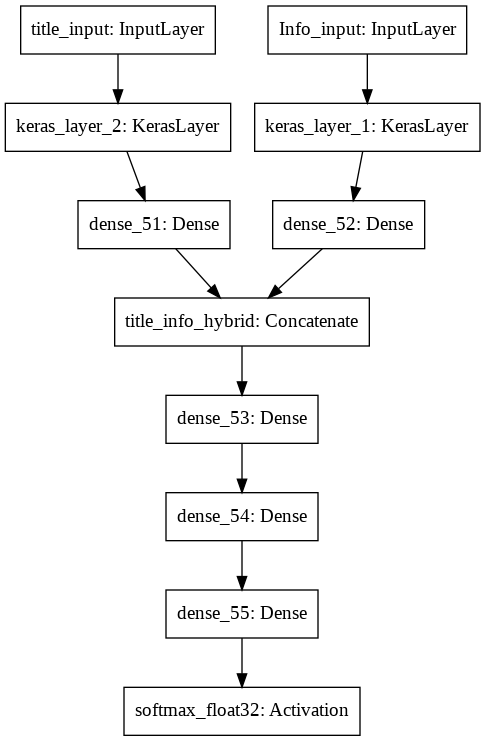

In [86]:
# Plot hybrid title and info model
from keras.utils.vis_utils import plot_model
plot_model(mult_model)

In [112]:
# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="accuracy",  
                                                 factor= 0.5,
                                                 patience=1,
                                                 verbose=1, 
                                                 min_lr=1e-7, 
                                                 )



In [88]:
# Compile the model 
mult_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),  
              optimizer = tf.keras.optimizers.Adam(), 
              metrics = ['accuracy'])

In [89]:
# Fit the model 
mult_history = mult_model.fit(train_mult_ds , 
                              steps_per_epoch = int(0.3 * len(train_mult_ds)),
                              epochs = 5 , 
                              callbacks = [reduce_lr])

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("Adam/gradients/PartitionedCall:1", shape=(None,), dtype=int64), values=Tensor("mul_2:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("Adam/gradients/PartitionedCall:2", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


24186/24186 [==============================] - 963s 40ms/step - loss: 1.9963 - accuracy: 0.6110
Epoch 2/5
24186/24186 [==============================] - 957s 40ms/step - loss: 1.2741 - accuracy: 0.7216
Epoch 3/5
24186/24186 [==============================] - 953s 39ms/step - loss: 1.1865 - accuracy: 0.7389
Epoch 4/5
 8063/24186 [=========>....................] - ETA: 10:36 - loss: 1.1585 - accuracy: 0.7451WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 120930 batches). You may need to use the repeat() function when building your dataset.


24186/24186 [==============================] - 318s 13ms/step - loss: 1.1585 - accuracy: 0.7451


In [90]:
test_data.isna().sum()

PRODUCT_ID           0
TITLE                7
DESCRIPTION      10469
BULLET_POINTS     6786
BRAND             2430
dtype: int64

In [92]:
test_data['DESCRIPTION'] = test_data['DESCRIPTION'].astype(str).apply(lambda x: cleanhtml(x))
test_data['TITLE'] = test_data['TITLE'].astype(str) 

test_desc = test_data['DESCRIPTION'].to_numpy()
test_title = test_data['TITLE'].to_numpy()

test_dataset = tf.data.Dataset.from_tensor_slices((test_title , test_desc))
test_dataset

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.string)>

In [ ]:
inputs = tf.keras.layers.Input(shape = (), dtype = tf.string)
x = base_layer(inputs)
#x = tf.keras.layers.Dense(264, activation = 'relu')(x)
x = tf.keras.layers.Dense(64, activation= 'relu')(x)
x  = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(len(train_sample.BROWSE_NODE_ID.value_counts()), activation ='softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None,)]                 0         
_________________________________________________________________
keras_layer (KerasLayer)     (None, 512)               256797824 
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 9919)              644735    
Total params: 257,475,391
Trainable params: 677,567
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
train_data

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
0,"Pete The Cat Bedtime Blues Doll, 14.5 Inch","Pete the Cat is the coolest, most popular cat ...","[Pete the Cat Bedtime Blues plush doll,Based o...",MerryMakers,0
1,"The New Yorker NYHM014 Refrigerator Magnet, 2 ...",The New Yorker Handsome Cello Wrapped Hard Mag...,[Cat In A Tea Cup by New Yorker cover artist G...,The New Yorker,1
2,The Ultimate Self-Sufficiency Handbook: A Comp...,NaN,Skyhorse Publishing,imusti,2
3,Amway Nutrilite Kids Chewable Iron Tablets (100),NaN,"[Nutrilite Kids,Chewable Iron Tablets,Quantity...",Amway,3
4,Teacher Planner Company A4 6 Lesson Academic T...,NaN,NaN,NaN,4
...,...,...,...,...,...
2903019,Premium Aviator Sunglasses - HD Polarized (Bri...,These premium Aviator Sunglasses with 5 color ...,"[Frame size: Lens height - 56mm, Lens width - ...",Generic,1040
2903020,Social Distance Stickers - Set of 5 Sticker Sl...,set of 5 prints social distancing sticker self...,[covid19 safety sticker - set of 5 to maintain...,Generic,15199
2903021,Torr-to Face Shield PACK OF 5 with Adjustable ...,* COMPLETE FACE PROTECTION: Torr-to Face Shiel...,"[350 MICRONS PACK OF 5 PCS,COMPLETE FACE PROTE...",TORR-TO,1044933
2903022,Type-C to 3.5 MM for Oppo R17 Pro Type-C to 3....,Still want to use your favorite earphones/head...,"[Indian Connectors: Made for Indian sockets, t...",SHOPBELL,14790


In [ ]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),  
              optimizer = tf.keras.optimizers.Adam(), 
              metrics = ['accuracy'])

In [ ]:
y_ds = tf.data.Dataset.from_tensors(train_sample['BROWSE_NODE_ID'].to_numpy())
y_ds

<TensorDataset shapes: (2903024,), types: tf.int64>

In [ ]:
x_ds = tf.data.Dataset.from_tensors(train_sample['title'].to_numpy())
x_ds

<TensorDataset shapes: (2903024,), types: tf.string>

In [ ]:
new_ds = tf.data.Dataset.zip((x_ds , y_ds))

In [ ]:
new_ds

<ZipDataset shapes: ((2903024,), (2903024,)), types: (tf.string, tf.int64)>

In [ ]:
train_dataset= tf.data.Dataset.from_tensor_slices((new_df['title'].values, new_df['BROWSE_NODE_ID'].to_numpy()))


In [ ]:
train_dataset = train_dataset.shuffle(buffer_size= 1000).batch(batch_size = 32).prefetch(tf.data.AUTOTUNE)
train_dataset

<PrefetchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int64)>

In [ ]:
for text , lab in train_dataset.take(1):
  print(text)
  print(lab)

tf.Tensor(
[[b'Amsik\xc2\xaeBlind Spot Round Mirror Black, (Real Glass Made, 2 Pcs/Set) for Toyota Fortuner'
  b'Nivea Face Sun Block Whitening Cream SPF 50 Pa ++ Made in Thailand'
  b"ROZVEH Women's Shift Brown Dress" ...
  b"SOCH Women's Cotton Straight Kurta NC KT 4402-BLACK-CREAM_Black_Small"
  b'Kuber Industries 100 Percent Cotton 144 TC Single Bed Sheet with 1 Pillow Covers (Light Green), CTKTC13535'
  b'MEDHA D.J. PLUS Professional SSA-250 Karoke PA Amplifier 6 Mic Input, 2 Aux, FM/USB Player with Bluetooth (250W RMS)']], shape=(1, 2903024), dtype=string)
tf.Tensor([[32296    35  1724 ...  1251  1084 45027]], shape=(1, 2903024), dtype=int64)


In [ ]:
first_model = model.fit(train_dataset,
                        epochs = 2)

Epoch 1/2
80622/80622 [==============================] - 794s 10ms/step - loss: 2.0750 - accuracy: 0.5622
Epoch 2/2
80622/80622 [==============================] - 786s 10ms/step - loss: 1.8526 - accuracy: 0.5984


In [97]:
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# test_data = pd.read_csv(test_path , escapechar = "\\" , quoting = csv.QUOTE_NONE)


In [ ]:
test_data['title'] = test_data.TITLE.astype(str)

In [ ]:
test_data

,PRODUCT_ID,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,title
0,1,"Command 3M Small Kitchen Hooks, White, Decorat...",Sale Unit: PACK,[INCLUDES - 9 hooks and 12 small indoor strips...,Command,"Command 3M Small Kitchen Hooks, White, Decorat..."
1,2,O'Neal Jump Hardware JAG Unisex-Adult Glove (B...,Synthetic leather palm with double-layer thumb...,[Silicone printing for a better grip. Long las...,O'Neal,O'Neal Jump Hardware JAG Unisex-Adult Glove (B...
2,3,"NFL Detroit Lions Portable Party Fridge, 15.8 ...",Boelter Brands lets you celebrate your favorit...,[Runs on 12 Volt DC Power or 110 Volt AC Power...,Boelter Brands,"NFL Detroit Lions Portable Party Fridge, 15.8 ..."
3,4,Panasonic Single Line KX-TS880MX Corded Phone ...,Features: 50 Station Phonebook Corded Phone Al...,Panasonic Landline Phones doesn't come with a ...,Panasonic,Panasonic Single Line KX-TS880MX Corded Phone ...
4,5,Zero Baby Girl's 100% Cotton Innerwear Bloomer...,"Zero Baby Girl Panties Set. 100% Cotton, Breat...","[Zero Baby Girl Panties, Pack of 6, 100% Cotto...",Zero,Zero Baby Girl's 100% Cotton Innerwear Bloomer...
...,...,...,...,...,...,...
110770,110771,AAHNA E MALL OneBlade Hybrid Trimmer Shaver An...,<p>1-All In One Hyper Advanced Smart Rechargea...,"[Unique One Blade can style, trim and shave, w...",Generic,AAHNA E MALL OneBlade Hybrid Trimmer Shaver An...
110771,110772,Grin Health N99 Anti Pollution Reusable Washab...,"<p>SIZE GUIDE : M - (35- 65 Kg), L - (49- 72 K...",[PROTECTION: Filtration rate up to ≥99 percent...,Grin Health,Grin Health N99 Anti Pollution Reusable Washab...
110772,110773,Asian Army Pink Ultra reusable respirator clot...,Asian HyperProtect A95 masks have been enginee...,[Reusable and environment friendly: These mask...,ASIAN,Asian Army Pink Ultra reusable respirator clot...
110773,110774,IM Safe 3 Ply Non-Woven Disposable Surgical Fa...,This 3 Ply Disposable face mask is manufacture...,[3 Ply Mask: Genuine 3 Ply Mask. 25 GSM Spun B...,Intermarket,IM Safe 3 Ply Non-Woven Disposable Surgical Fa...


In [ ]:
# # Now one hot encoding the labels 
# from sklearn.preprocessing import OneHotEncoder
# one_hot_encoder = OneHotEncoder(sparse = False)
# train_labels = one_hot_encoder.fit_transform(new_train_sample['BROWSE_NODE_ID'].to_numpy().reshape(-1 , 1))

In [100]:
#mult_model.save(')
tf.keras.models.save_model(mult_model , 'drive/MyDrive/amazon_ml/')

NotImplementedError: ignored

In [115]:
inputs = tf.keras.layers.Input(shape = (), dtype = tf.string)
x = base_layer(inputs)
x = tf.keras.layers.Dense(264, activation = 'relu')(x)
x = tf.keras.layers.Dense(64, activation= 'relu')(x)
x  = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(len(train_sample.BROWSE_NODE_ID.value_counts()))(x)
outputs = layers.Activation('softmax' , dtype = tf.float32)(x)
model = tf.keras.Model(inputs, outputs)

In [116]:
model.summary()

Model: "model_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None,)]                 0         
_________________________________________________________________
keras_layer_1 (KerasLayer)   (None, 512)               256797824 
_________________________________________________________________
dense_59 (Dense)             (None, 264)               135432    
_________________________________________________________________
dense_60 (Dense)             (None, 64)                16960     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 9919)              644735    
_________________________________________________________________
activation_1 (Activation)    (None, 9919)              0  

In [105]:
new_train_ds = tf.data.Dataset.from_tensor_slices((train_desc , labels))
new_train_ds = new_train_ds.batch(32).prefetch(tf.data.AUTOTUNE)

In [117]:
# Compile the model 
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),  
              optimizer = tf.keras.optimizers.Adam(), 
              metrics = ['accuracy'])

In [ ]:
# Fit the model 
history = model.fit(new_train_ds , 
                              steps_per_epoch = len(new_train_ds),
                              epochs = 5 , 
                              callbacks = [reduce_lr])

Epoch 1/5
57364/80622 [====================>.........] - ETA: 7:04 - loss: 3.8123 - accuracy: 0.3176

In [98]:
# Making prediction 
pred_probs = mult_model.predict(test_dataset)
pred_probs[:10]

ValueError: ignored

In [ ]:
pred_classes = pred_probs.argmax(axis = 1)
pred_classes[:10]

array([1140, 2321,   69,  125, 7644,   33, 3329, 1092, 2637, 3503])

In [ ]:
submission = pd.DataFrame({'PRODUCT_ID': test_data['PRODUCT_ID'].values , 
                           'BROWSE_NODE_ID': pred_classes})
submission.head(10)

,PRODUCT_ID,BROWSE_NODE_ID
0,1,1140
1,2,2321
2,3,69
3,4,125
4,5,7644
5,6,33
6,7,3329
7,8,1092
8,9,2637
9,10,3503


In [ ]:
submission.shape

(110775, 2)

In [ ]:
submission.to_csv('submission.csv' , index = False)